# Tudengite lõpetamine

In [1]:
import pandas as pd
from collections import Counter
import codecs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#KATALOOG = "e:\\TTY\\tudengid\\"
KATALOOG = "..\\"
tudengid = pd.read_csv(KATALOOG+"ybi_tudengid.csv", sep=';', decimal=",", 
                      encoding='latin1', parse_dates=['SISSEASTUMISAASTA'])

C:\Anaconda3\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (37,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [2]:
print(tudengid.columns)
print(tudengid.columns[37], tudengid.columns[39], tudengid.columns[40])
maxs = sorted(tudengid["SISSEASTUMISAASTA"]) # NaT kuupäevad ajavad sortimise segadusse
maxt = max(tudengid["SISSEASTUMISAASTA"])
print( maxt > maxs[-1])
print(maxt in maxs)
maxi = maxs.index(maxt)
print(maxi, len(maxs))
print(maxs[maxi:maxi+15])


datecount = Counter([date.year for date in tudengid["SISSEASTUMISAASTA"]])
for year in sorted(datecount.keys()):
    print(year, datecount[year])

Index(['SYNNIAEG', 'SUGU', 'ELAMISLUBA_TAHIS', 'ELAMISLUBA_TEKST', 'ELUKOHT_TAHIS', 'ELUKOHT_TEKST', 'SUHTLUSKEEL_TAHIS', 'SUHLUSKEEL_TEKST', 'KODAKONDSUS_TAHIS', 'KODAKONDSUS_TEKST', 'AADRESS', 'INDEKS', 'LINN_MAAKOND', 'LINN_MAAKOND_1', 'AKTIIVSUS', 'ISIK_ID', 'FK_OPPIJA_ID', 'SISSEASTUMISAASTA', 'OPPETASE_TAHIS', 'OPPETASE_TEKST', 'OPPEKAVA_KOOD', 'OPPEKAVA_NIMETUS', 'SPETSIALISEERUMISE_NIMETUS', 'OPPEVORM_TAHIS', 'OPPEVORM_TEKST', 'OPPEKOORMUS_TAHIS', 'OPPEKOORMUS_TEKST', 'REL', 'LISAREL', 'SEL', 'LOPETANUD', 'OPPEKEEL_TAHIS', 'OPPEKEEL_TEKST', 'EELMINE_KOOL', 'EELM_VALISM', 'EELM_OPPEVORM_TAHIS', 'EELM_OPPEVORM_KOOD', 'EELM_OPPETASE_TAHIS', 'EELM_OPPETASE_TEKST', 'EELM_OPPEKEEL_TAHIS', 'EELM_OPPEKEEL_TEKST', 'KOKKU_AP', 'KOKKU_EAP', 'KKH_AP', 'KKH_EAP'], dtype='object')
EELM_OPPETASE_TAHIS EELM_OPPEKEEL_TAHIS EELM_OPPEKEEL_TEKST
True
True
48496 60019
[Timestamp('2014-07-16 00:00:00'), Timestamp('2014-07-16 00:00:00'), Timestamp('2014-07-16 00:00:00'), Timestamp('2014-07-16 00:00:0

In [3]:
#for t in tudengid: print(t)
#t_kavad = [t["OPPEKAVA_KOOD"] + " " + t["OPPEKAVA_NIMETUS"] for t in tudengid]
t_kavad = tudengid["OPPEKAVA_KOOD"] + " " + tudengid["OPPEKAVA_NIMETUS"]
kavad = Counter(t_kavad)

for kava in sorted(kavad):
    if kava[0] in ("I", "L"):
        print(kava, kavad[kava])
        
"""
koodid = Counter(tudengid["OPPEKAVA_KOOD"])
for kood in sorted(koodid):
    if kood[0] == "I":
        print(kood, koodid[kood])
        
kavad = Counter(tudengid["OPPEKAVA_NIMETUS"])
for k in kavad:
    print(k, kavad[k])
""" 


IABB02 Äriinfotehnoloogia 1427
IABM02 Äriinfotehnoloogia 478
IAEB02 Elektroonika ja bioonika 442
IAEM02 Elektroonika ja bioonika 153
IALB13 Elektroonika ja telekommunikatsioon 33
IANM02 Informaatika mitteinformaatikutele 68
IAPB02 Informaatika 1944
IAPM02 Informaatika 735
IAQD02 Info- ja kommunikatsioonitehnoloogia 304
IASB02 Arvutisüsteemid 1691
IASM02 Arvutisüsteemid 404
IATB02 Telekommunikatsioon 650
IATM02 Telekommunikatsioon 243
IVCM09 Küberkaitse 235
IVEM11 Elektroonika ja kommunikatsioon 37
IVGM13 E-riigi tehnoloogiad ja teenused 27
IVIM03 Infotehnoloogia 18
IVSM09 Tarkvaratehnika 171
LAB 01 Äriinfotehnoloogia 44
LAC 97 Telekommunikatsioon 303
LACD97 Telekommunikatsioon 6
LACM97 Telekommunikatsioon 85
LAE 97 Elektroonika ja biomeditsiinitehnika 303
LAED97 Elektroonika ja biomeditsiinitehnika 17
LAEM97 Elektroonika ja biomeditsiinitehnika 54
LAP 97 Informaatika 578
LAPD97 Informaatika 17
LAPM97 Informaatika 296
LAS 97 Arvuti- ja süsteemitehnika 729
LASD97 Arvuti- ja süsteemitehni

'\nkoodid = Counter(tudengid["OPPEKAVA_KOOD"])\nfor kood in sorted(koodid):\n    if kood[0] == "I":\n        print(kood, koodid[kood])\n        \nkavad = Counter(tudengid["OPPEKAVA_NIMETUS"])\nfor k in kavad:\n    print(k, kavad[k])\n'

In [4]:
for attr in ["SISSEASTUMISAASTA", "REL", "KOKKU_AP"]:
    print(tudengid[attr].describe(), "\n")

count                   58978
unique                    708
top       2013-08-16 00:00:00
freq                     2932
first     1981-04-08 00:00:00
last      2014-07-16 00:00:00
Name: SISSEASTUMISAASTA, dtype: object 

count    21855.000000
mean         1.547060
std          2.225498
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         10.000000
Name: REL, dtype: float64 

count    58721.000000
mean        53.105272
std         62.090894
min          0.000000
25%          1.000000
50%         16.000000
75%        120.000000
max        269.000000
Name: KOKKU_AP, dtype: float64 



In [5]:
def oppekava_tudengid(tudengid, ok_kood, alg, lopp):
    """
    Filtreeri tudengite DataFrame'st välja õppekava tudengid
    koodi, algus- ja lõpuaja alusel (pd.Timestamp). 
    Tagastab vastava DataFrame'i.
    """
    result = tudengid[(tudengid.OPPEKAVA_KOOD == ok_kood) &
                      (tudengid.SISSEASTUMISAASTA > alg) &
                      (tudengid.SISSEASTUMISAASTA < lopp)]
    return result


iapb09_tud = oppekava_tudengid(tudengid, ok_kood="IAPB02", 
                       alg=pd.Timestamp('2009-01-01 00:00:00'),
                       lopp=pd.Timestamp('2014-01-01 00:00:00'))

#iapb09_tud.describe()
iapb09_tud.OPPEKAVA_KOOD.describe()

count        852
unique         1
top       IAPB02
freq         852
Name: OPPEKAVA_KOOD, dtype: object

## Soorituste lugemine ja ühendamine

Ajamahukas operatsioon. Salvestada vahetulemus.

In [6]:
sooritusfailid = ["ybi_sooritused_1-5000.csv",
                  "ybi_sooritused_5001_10000.csv",
                  "ybi_sooritused_10001_15000.csv",
                  "ybi_sooritused_15001_20000.csv",
                  "ybi_sooritused_20001_25000.csv", 
                  "ybi_sooritused_25001_30000.csv", 
                  "ybi_sooritused_30001_40000.csv",#siiani tühjad
                  "ybi_sooritused_40001_65000.csv",
                  "ybi_sooritused_65001_75000.csv",
                  "ybi_sooritused_75001_85000.csv",
                  "ybi_sooritused_85001_.csv"]

def write_iapb09_sooritused():
    with codecs.open(KATALOOG+'iapb09_sooritused_korrekt.csv', 'a', encoding='latin1') as f:
        for fn in sooritusfailid[-4:]:          
            sooritus1 = pd.read_csv(KATALOOG+fn, sep=';', decimal=",", 
                               encoding='latin1', parse_dates=['SOORITAMISE_KUUPAEV'])
            #print(len(sooritus1.ISIK_ID), len(sooritus1))
            #iapb09_sooritus = sooritus1[sooritus1.ISIK_ID.isin(iapb09_tud.ISIK_ID)] # isikukood vs matrikli nr
            
            # Seome matrikli nr. (õppesessiooni) alusel
            iapb09_sooritus = sooritus1[sooritus1.FK_OPPIJA_ID.isin(iapb09_tud.FK_OPPIJA_ID)] 
            print(fn, len(iapb09_sooritus))
            iapb09_sooritus.to_csv(f, sep=';', decimal=",", encoding='latin1')


#write_iapb09_sooritused()
iapb09_sooritused =  pd.read_csv(KATALOOG+"iapb09_sooritused_korrekt.csv", sep=';', decimal=",", 
                      encoding='latin1', parse_dates=['SOORITAMISE_KUUPAEV'])
iapb09_sooritused.columns

Index(['Unnamed: 0', 'ISIK_ID', 'FK_OPPIJA_ID', 'AINEKOOD', 'AINE_LIIK', 'AP', 'EAP', 'KOHUSTUSLIK', 'MOODUL', 'ECTS_MOODUL', 'HINNE', 'SOORITAMISE_KUUPAEV', 'SOORITUSE_OPPEJOUD', 'OPPEJOUD', 'OPPEJOU_STRUKTUUR', 'OPPEJOU_STRUKTUUR_NIMETUS', 'FK_OPPEJOUD_ID', 'ARVESTATAV', 'KORRAS', 'DEKLAR_SEMESTER'], dtype='object')

In [7]:
# Asenda võõrkeele ainekoodid üldise koodiga õppekavast
iapb09_sooritused.AINEKOOD = iapb09_sooritused.AINEKOOD.replace(['HLE0020', 'HLI0020', 'HLS0020'], 'HLX0020')

## Õppekava lugemine

In [8]:
def ained_to_csv():
    with codecs.open(KATALOOG+'iapb09.txt', 'r', encoding='latin1') as f:
        pais = f.readline()
        indeks = pais.upper().split()
        data = []
        for rida in f:
            r = rida.split()
            if len(r) > 10:
                rlist = [r[0]] + [" ".join(r[1:-9])] + r[-9:]
                data.append(rlist)
    iapb09_ained = pd.DataFrame(data, columns=indeks)
    #print(iapb09_ained)
    iapb09_ained.to_csv(KATALOOG+'iapb09_ained.csv', sep=';', decimal=",", encoding='latin1')
      
#ained_to_csv()
iapb09_ained = pd.read_csv(KATALOOG+'iapb09_ained.csv', sep=';', decimal=",", encoding='latin1')
iapb09_ained.columns     

Index(['Unnamed: 0', 'AINEKOOD', 'AINE_NIMETUS', 'EAP', 'NÄD_TUNNID', 'LO', 'PR', 'HA', 'E/A/H', 'ÕPET.SEM.', 'SEMESTRI_NR', 'KOHUSTUSLIK'], dtype='object')

## Sooritamise semestri arvutamine

In [9]:
def semester_diff(t1, t2):  # Ebatäpne. Sessi lõpupäevade loetelu? Reeglite muutus s.a. kpst. !?
    p = np.timedelta64(183,'D')
    try:
        diff = (t2 - t1) / p
    except:
        diff = (pd.Timestamp(t2) - pd.Timestamp(t1)) / p
    return round(diff)

    
semester_dates = ['2010-01-22', '2010-06-12',
                  '2011-01-21', '2011-06-11',
                  '2012-01-22', '2012-06-09',
                  '2013-01-22', '2013-06-08',
                  '2014-02-02', '2014-06-14'] # muutus korralduses
semester_dates = [pd.Timestamp(d) for d in semester_dates]
ENDDATE = pd.Timestamp('2014-06-21')

def semester_tablediff(t1, t2):
    try:
        t1 = pd.Timestamp(t1)
        t2 = pd.Timestamp(t2)
    except:
        pass
    if t1 < t2:
        mul = 1
    else:
        t2, t1 = t1, t2
        mul = -1
    between = [d for d in semester_dates if (t1<d<t2)]
    semester_count = 1 + len(between)
    return mul * semester_count

t1 = pd.Timestamp('2010-08-01')
for t2 in [pd.Timestamp('2009-08-01'), 
           pd.Timestamp('2011-02-01'), 
           pd.Timestamp('2011-08-01'), 
           pd.Timestamp('2012-09-30')]:
    print(t1, t2, semester_tablediff(t1, t2))
    
for t2 in iapb09_sooritused.SOORITAMISE_KUUPAEV[:9]:
    print(t1, t2, semester_tablediff(t1, t2))

2010-08-01 00:00:00 2009-08-01 00:00:00 -3
2010-08-01 00:00:00 2011-02-01 00:00:00 2
2010-08-01 00:00:00 2011-08-01 00:00:00 3
2010-08-01 00:00:00 2012-09-30 00:00:00 5
2010-08-01 00:00:00 2010-01-21 00:00:00 -3
2010-08-01 00:00:00 2010-04-06 00:00:00 -2
2010-08-01 00:00:00 2010-05-25 00:00:00 -2
2010-08-01 00:00:00 2011-01-19 00:00:00 1
2010-08-01 00:00:00 2011-06-01 00:00:00 2
2010-08-01 00:00:00 2010-05-19 00:00:00 -2
2010-08-01 00:00:00 2010-05-01 00:00:00 -2
2010-08-01 00:00:00 2010-01-18 00:00:00 -3
2010-08-01 00:00:00 2011-01-17 00:00:00 1


## Tudengite võlgade koondtabeli koostamine

In [10]:
def volg(ainekood, semester, ained):
    """
    Tagasta võlg ainekoodiga aine jaoks kavast ained kui see sooritati semestril 
    """
    aine_semester = ained[ained.AINEKOOD == ainekood].SEMESTRI_NR.iloc[0]
    vahe = semester - aine_semester
    if vahe > 0:
        return vahe
    else:
        return 0
    
print(volg('IDN0011', 8, iapb09_ained))
    
    
def sooritusajad(tudengid, sooritused, ained):
    """
    Tudengite-Ainete risttabel.
    Näitab, mitu semestrit on esitamine hilinenud, 
    0 kui õigeaegne, NaN kui esitamist pole.
    tudengid - tudengite tabel
    sooritused - soorituste tabel
    ained - ainete tabel
    """

    # Lisa soorituste järgi võlad
    #    Ühenda soorituste ja tudengite tabel
    k_sooritused = sooritused[sooritused.AINEKOOD.isin(ained.AINEKOOD) &
                              ~sooritused.HINNE.isin(["0", "M"])] 
    k_sooritused['FK_OPPIJA_ID'] = k_sooritused['FK_OPPIJA_ID'].convert_objects(convert_numeric=True)
    soor_tud = pd.merge(k_sooritused, tudengid, on="FK_OPPIJA_ID") #str ja int
    
    #    Lisa veerg SEMESTER sooritamise semestri jaoks
    vahefun = lambda x: semester_diff(x['SISSEASTUMISAASTA'], x['SOORITAMISE_KUUPAEV'])
    soor_tud['SEMESTER'] = soor_tud.apply(vahefun, axis=1)

    #    Lisa veerg VOLG näitamaks võlga
    volgfun = lambda x: volg(x['AINEKOOD'], x['SEMESTER'], ained)
    soor_tud['VOLG'] = soor_tud.apply(volgfun, axis=1)
    
    # Grupeeri ainete ja tudengite järgi, leides minimaalse võla
    sooritusgrupid = soor_tud.groupby(['FK_OPPIJA_ID', 'AINEKOOD'], as_index=False)
    min_volg = sooritusgrupid['FK_OPPIJA_ID', 'AINEKOOD', 'VOLG'].min()
    
    # Tee vastav PivotTable Tudeng/Aine, sees võlad
    tudengi_ained = min_volg.pivot('FK_OPPIJA_ID', 'AINEKOOD')
    #print(tudengi_ained.head(20))
    return tudengi_ained

kohustuslikud_ained = iapb09_ained[iapb09_ained.KOHUSTUSLIK == 1]
iapb09_ajad = sooritusajad(iapb09_tud, iapb09_sooritused, kohustuslikud_ained)
iapb09_ajad.columns = iapb09_ajad.columns.droplevel()
iapb09_ajad

7


C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AINEKOOD,EKE0140,HHF3080,HLX0020,IAF0041,IAY0010,IDK0051,IDK0071,IDK1011,IDK1031,IDN0011,...,ITV0010,ITV0110,ITV0130,TET3070,TTO3160,UTT0010,YFR0011,YMA3710,YMM3731,YMR0170
FK_OPPIJA_ID,,,,,,,,,,,,,,,,,,,,,
60099,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
60220,0,6,0,4,5,7,5,NaN,3,4,...,4,2,NaN,NaN,0,0,0,0,0,1
62357,0,NaN,NaN,NaN,0,NaN,NaN,0,0,2,...,0,NaN,NaN,NaN,0,0,NaN,NaN,0,NaN
62358,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,2,...,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
62359,NaN,NaN,NaN,0,0,3,0,0,NaN,2,...,0,0,1,2,0,0,NaN,2,NaN,NaN
62360,0,1,0,0,1,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
62361,0,0,NaN,NaN,0,NaN,NaN,0,0,2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
62413,0,1,0,0,0,0,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
62414,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN


In [11]:
iapb09_ajad.count()


AINEKOOD
EKE0140     558
HHF3080     569
HLX0020     325
IAF0041     460
IAY0010     649
IDK0051     239
IDK0071     193
IDK1011     584
IDK1031     499
IDN0011     695
IDU0200     147
IDU0220     228
IDU0230     141
IDU3350     357
IED0150     162
IRT3930     360
ISP0040     279
ISS0010     312
ISS0050     532
ISS0110     639
ITI0011     266
ITI0021     157
ITI0050     146
ITV0010     616
ITV0110     272
ITV0130     173
TET3070     185
TTO3160     665
UTT0010     665
YFR0011     440
YMA3710     279
YMM3731     509
YMR0170     246
dtype: int64

## Märgi kui pikalt on aine sooritamata olnud (-semestrite arv andmete lõpuni ENDDATE)

In [12]:


vahefun = lambda x: semester_diff(ENDDATE, x['SISSEASTUMISAASTA'])
tud_end = iapb09_tud.apply(vahefun, axis=1)
iapb09_hilinemised = pd.DataFrame(np.add.outer(tud_end, kohustuslikud_ained.SEMESTRI_NR) - 1, 
                                  index=iapb09_tud.FK_OPPIJA_ID, columns=kohustuslikud_ained.AINEKOOD)

VARAJANE = 11

iapb09_hilinemised[iapb09_hilinemised >= 0] = VARAJANE #np.NaN
iapb09_hilinemised


AINEKOOD,ITV0010,IDN0011,IDK1011,UTT0010,IAY0010,HHF3080,TTO3160,YMM3731,ISS0110,IDK1031,...,ISP0040,YMR0170,ITI0050,ITI0021,IED0150,IDU0230,IDK0071,TET3070,ITV0130,IDU0200
FK_OPPIJA_ID,,,,,,,,,,,,,,,,,,,,,
62465,-10,-10,-10,-10,-10,-10,-10,-10,-10,-9,...,-7,-7,-6,-6,-6,-6,-6,-5,-5,-5
63197,-10,-10,-10,-10,-10,-10,-10,-10,-10,-9,...,-7,-7,-6,-6,-6,-6,-6,-5,-5,-5
62732,-10,-10,-10,-10,-10,-10,-10,-10,-10,-9,...,-7,-7,-6,-6,-6,-6,-6,-5,-5,-5
63718,-10,-10,-10,-10,-10,-10,-10,-10,-10,-9,...,-7,-7,-6,-6,-6,-6,-6,-5,-5,-5
64009,-10,-10,-10,-10,-10,-10,-10,-10,-10,-9,...,-7,-7,-6,-6,-6,-6,-6,-5,-5,-5
63979,-10,-10,-10,-10,-10,-10,-10,-10,-10,-9,...,-7,-7,-6,-6,-6,-6,-6,-5,-5,-5
64245,-10,-10,-10,-10,-10,-10,-10,-10,-10,-9,...,-7,-7,-6,-6,-6,-6,-6,-5,-5,-5
63903,-10,-10,-10,-10,-10,-10,-10,-10,-10,-9,...,-7,-7,-6,-6,-6,-6,-6,-5,-5,-5
63185,-10,-10,-10,-10,-10,-10,-10,-10,-10,-9,...,-7,-7,-6,-6,-6,-6,-6,-5,-5,-5


In [13]:
iapb09_combo = iapb09_ajad.combine_first(iapb09_hilinemised)

_ained = kohustuslikud_ained.loc[:, ['AINEKOOD', 'SEMESTRI_NR']]
_ained.set_index('AINEKOOD', inplace=True)
_ained['VOLG'] = iapb09_combo[iapb09_combo>=0].count()
#sorditud_ainekoodid = kohustuslikud_ained.sort('SEMESTRI_NR', ascending=False).AINEKOOD
sorditud_ainekoodid = _ained.sort(['SEMESTRI_NR', 'VOLG'], ascending=False).index
iapb09_combo = iapb09_combo[sorditud_ainekoodid]

iapb09_combo = iapb09_combo.transpose()
_aastad = pd.concat([iapb09_tud.FK_OPPIJA_ID, iapb09_tud.SISSEASTUMISAASTA.map(lambda x: x.year)], axis=1)
_aastad.set_index('FK_OPPIJA_ID', inplace=True)
_aastad['VOLG'] = iapb09_combo[iapb09_combo>=0].count()
sorditud_tudengid = _aastad.sort(['SISSEASTUMISAASTA', 'VOLG']).index
iapb09_combo = iapb09_combo[sorditud_tudengid]

iapb09_combo


FK_OPPIJA_ID,62465,63197,62732,63718,63979,64245,63903,63179,62555,62742,...,88328,88330,88332,88333,88335,88338,88346,88353,88359,88360
AINEKOOD,,,,,,,,,,,,,,,,,,,,,
TET3070,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,...,11,11,11,11,11,11,11,11,11,11
ITV0130,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,...,11,11,11,11,11,11,11,11,11,11
IDU0200,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,...,11,11,11,11,11,11,11,11,11,11
IDK0071,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,...,11,11,11,11,11,11,11,11,11,11
IED0150,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,...,11,11,11,11,11,11,11,11,11,11
ITI0021,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,...,11,11,11,11,11,11,11,11,11,11
ITI0050,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,...,11,11,11,11,11,11,11,11,11,11
IDU0230,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6,...,11,11,11,11,11,11,11,11,11,11
ISS0010,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,...,11,11,11,11,11,11,11,11,11,11


## Tee *heatmap*

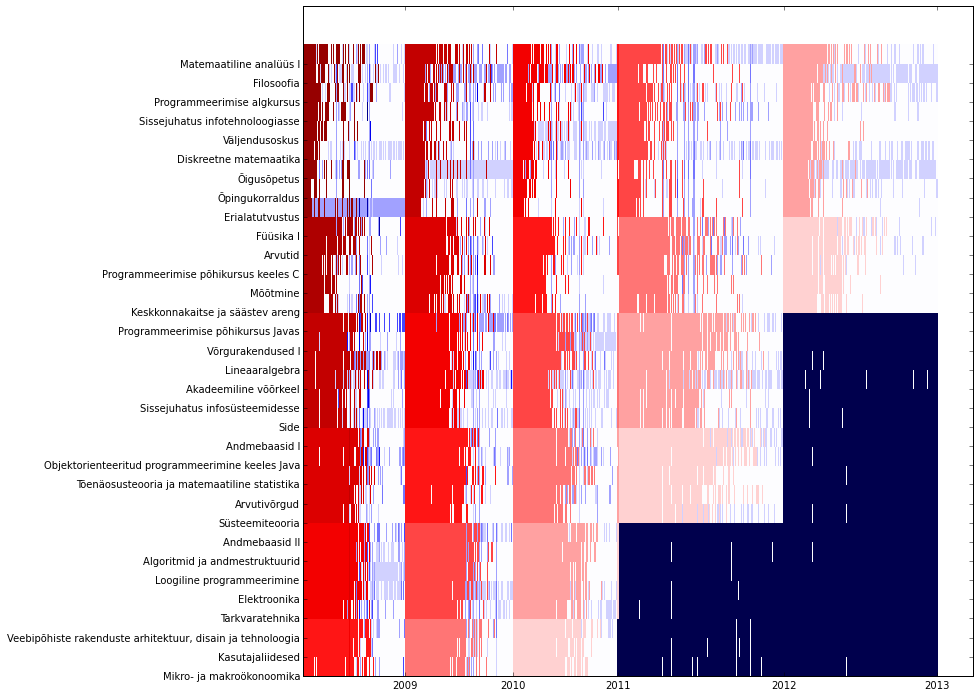

In [14]:
def draw_heatmap(data, ained=kohustuslikud_ained, aastad=_aastad):
    heatmap = plt.pcolor(data, cmap='seismic_r') #RdYlBu, BrBG
    
    # Joonista y-sildid
    y_sildid = ained.set_index('AINEKOOD').loc[data.index].AINE_NIMETUS
    plt.yticks(range(len(y_sildid)), y_sildid)
    
    # Joonista x-sildid
    cum_tudengeid = 0
    x_sildid = []
    x_pos = []
    for a, g in aastad.groupby("SISSEASTUMISAASTA"):
        x_sildid.append(a)
        cum_tudengeid += len(g)
        x_pos.append(cum_tudengeid)
    plt.xticks(x_pos, x_sildid)
    
    heatmap.figure.set_size_inches(12, 12)
    plt.show()

draw_heatmap(iapb09_combo)


In [15]:
for a, g in _aastad.groupby("SISSEASTUMISAASTA"):
    print(a, len(g))

2009 137
2010 145
2011 141
2012 223
2013 206


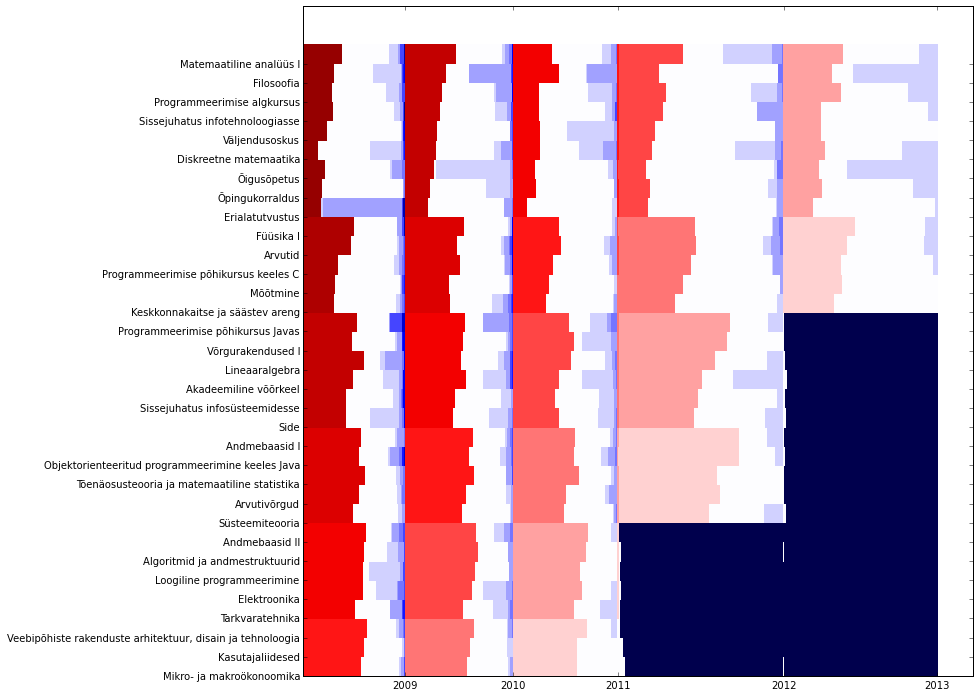

In [16]:
def sorted_table(df, groups):
    """
    Sort each row by 'groups' column groups
    """
    return pd.concat([df.loc[:, g].apply(np.sort, axis=1) for g in groups], axis=1)

iapb09_subsort = sorted_table(iapb09_combo, [g[1].index for g in _aastad.groupby("SISSEASTUMISAASTA")])
draw_heatmap(iapb09_subsort)

# Leia kontseptikate

In [17]:
import kernel_fca_oo as krn

In [18]:
_aastad[_aastad.SISSEASTUMISAASTA<2012].index


Int64Index([62465, 63197, 62732, 63718, 64009, 63979, 64245, 63903, 63185, 63179, 63184, 63188, 62555, 62741, 62742, 62358, 62416, 62462, 62559, 62357, 62422, 63186, 62929, 62464, 62419, 63041, 62924, 63059, 63357, 62557, 64228, 62727, 62414, 63176, 62934, 68480, 64007, 68227, 68337, 63183, 62685, 63222, 68237, 68241, 62733, 62928, 63200, 68414, 62463, 68561, 68481, 62561, 62927, 63034, 70406, 68421, 68423, 69049, 68232, 68238, 68567, 68420, 68427, 69015, 68478, 68563, 69020, 69042, 68422, 69048, 69043, 68569, 68296, 68560, 68416, 62423, 68234, 68224, 68566, 68419, 70401, 68233, 63054, 68239, 69040, 68564, 69046, 68489, 69047, 68483, 69031, 68428, 68417, 68521, 68335, 62361, 63196, 62765, 74747, 69045, ...], dtype='int64')

In [19]:
iapb09_11 = iapb09_combo[_aastad[_aastad.SISSEASTUMISAASTA<2012].index]
iapb09_11_bin = iapb09_11 < 0
iapb09_11_bin = iapb09_11_bin.astype(int)

In [20]:
ks = krn.FCASystemDF(iapb09_11_bin)
cc = ks.conceptcover()



In [31]:
def concept_str(c_ainekoodid, c_tudengid, ained=kohustuslikud_ained):
    aine_df = ained[ained.AINEKOOD.isin(c_ainekoodid)]
    c_ained = aine_df.SEMESTRI_NR.astype(str) + ". " + aine_df.AINE_NIMETUS
    return ",\n".join(c_ained) + "\nTud: " + str(len(c_tudengid)) + "\n"  

print("Tabel (r, v):", iapb09_11_bin.shape, "\n")
    
for e, i in cc:
    print(concept_str(e, i))

Tabel (r, v): (33, 423) 

2. Mõõtmine,
4. Tõenäosusteooria ja matemaatiline statistika,
5. Algoritmid ja andmestruktuurid
Tud: 153

5. Andmebaasid II
Tud: 282

6. Veebipõhiste rakenduste arhitektuur, disain ja tehnoloogia
Tud: 279

5. Loogiline programmeerimine
Tud: 267

5. Elektroonika
Tud: 264

6. Kasutajaliidesed
Tud: 257

4. Andmebaasid I
Tud: 255

6. Mikro- ja makroökonoomika
Tud: 249

4. Objektorienteeritud programmeerimine keeles Java
Tud: 245

3. Lineaaralgebra
Tud: 238

5. Tarkvaratehnika
Tud: 232

3. Programmeerimise põhikursus Javas
Tud: 230

4. Arvutivõrgud
Tud: 230

3. Võrgurakendused I
Tud: 228

4. Süsteemiteooria
Tud: 214

2. Füüsika I
Tud: 212

3. Akadeemiline võõrkeel
Tud: 212

2. Arvutid
Tud: 201

3. Side
Tud: 186

3. Sissejuhatus infosüsteemidesse
Tud: 183

2. Programmeerimise põhikursus keeles C
Tud: 176

1. Matemaatiline analüüs I
Tud: 175

1. Filosoofia
Tud: 161

2. Keskkonnakaitse ja säästev areng
Tud: 148

5. Algoritmid ja andmestruktuurid
Tud: 281

1. Programme

In [22]:
#print(kohustuslikud_ained[kohustuslikud_ained.AINEKOOD.isin(['ITI0050', 'YMR0170', 'ISS0050'])])

In [23]:
kst = krn.FCASystemDF(iapb09_11_bin.transpose())
cct = kst.conceptcover()


In [24]:
for e, i in cct:
    print(concept_str(i, e), "\n")

2. Arvutid,
2. Füüsika I,
3. Programmeerimise põhikursus Javas,
3. Akadeemiline võõrkeel,
3. Side,
3. Võrgurakendused I,
3. Lineaaralgebra,
3. Sissejuhatus infosüsteemidesse,
4. Objektorienteeritud programmeerimine keeles Java,
4. Andmebaasid I,
4. Süsteemiteooria,
4. Arvutivõrgud,
4. Tõenäosusteooria ja matemaatiline statistika,
5. Algoritmid ja andmestruktuurid,
5. Loogiline programmeerimine,
5. Elektroonika,
5. Andmebaasid II,
5. Tarkvaratehnika,
6. Mikro- ja makroökonoomika,
6. Kasutajaliidesed,
6. Veebipõhiste rakenduste arhitektuur, disain ja tehnoloogia
Tud: 143
 

1. Sissejuhatus infotehnoloogiasse,
1. Programmeerimise algkursus,
1. Õpingukorraldus,
1. Diskreetne matemaatika,
1. Filosoofia,
1. Õigusõpetus,
1. Matemaatiline analüüs I,
1. Väljendusoskus,
2. Programmeerimise põhikursus keeles C,
2. Keskkonnakaitse ja säästev areng,
2. Arvutid,
2. Mõõtmine,
2. Füüsika I,
3. Programmeerimise põhikursus Javas,
3. Side,
3. Võrgurakendused I,
3. Sissejuhatus infosüsteemidesse,
4. Objek

## Märgi eraldi üldse sooritamata ained

C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


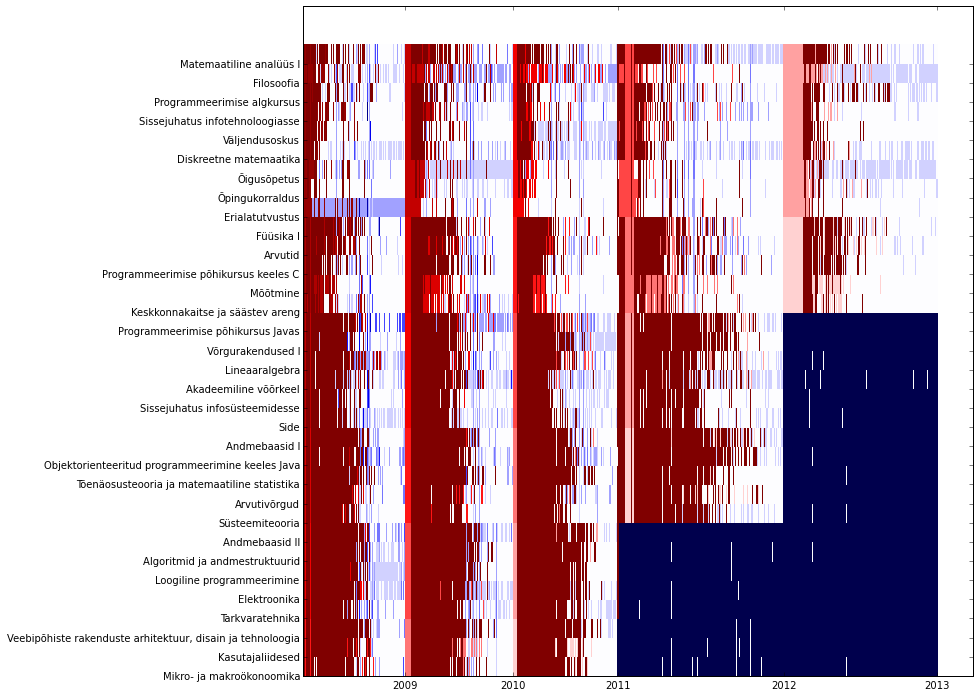

In [25]:

def sooritamisi(tudengid, sooritused, ained):
    o_sooritused = sooritused[sooritused.AINEKOOD.isin(ained.AINEKOOD)] 
    o_sooritused['FK_OPPIJA_ID'] = o_sooritused['FK_OPPIJA_ID'].convert_objects(convert_numeric=True)
    soor_tud = pd.merge(o_sooritused, tudengid, on="FK_OPPIJA_ID") #str ja int
    sooritusgrupid = soor_tud.groupby(['FK_OPPIJA_ID', 'AINEKOOD'])
    raw_count = sooritusgrupid.count()
    raw_count = raw_count.reset_index()
    raw_count = raw_count[['FK_OPPIJA_ID', 'AINEKOOD', 'Unnamed: 0']]
    result = raw_count.pivot('FK_OPPIJA_ID', 'AINEKOOD')
    result.columns = result.columns.droplevel()
    return result

sooritamiste_arv = sooritamisi(iapb09_tud, iapb09_sooritused, kohustuslikud_ained)
puudu_katsed = sooritamiste_arv.isnull().transpose()
iapb09_combo2 = iapb09_combo[iapb09_combo<0][puudu_katsed]
iapb09_combo2[iapb09_combo2.notnull()]  = -11
iapb09_combo2 = iapb09_combo2.combine_first(iapb09_combo)
iapb09_combo2
draw_heatmap(iapb09_combo2)

In [26]:
print(iapb09_sooritused.HINNE.value_counts())
print((iapb09_sooritused.HINNE == "M").sum() / iapb09_sooritused.HINNE.count())


A        5702
5        2451
4        2219
3        2095
2        1774
M        1503
1        1401
0        1275
HINNE       3
dtype: int64
0.0815828041036


In [27]:
tud_tulemused = iapb09_sooritused.groupby(['FK_OPPIJA_ID', 'AINEKOOD'])

#help(tud_tulemused.aggregate) 


In [28]:
tulemusM = tud_tulemused["HINNE"].aggregate(lambda x: (x=="M").all())
tulemusM.sum()

1468